In [1]:
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
#Data cleaning by removing null value if any

df2.isnull().sum()

#as we have huge number of rows incomparision to number of na values so removing those na vavlue rows won't cause any effect... if we don't want to remove those na value rows then we can replace those na values by taking the median of all the data present in that particular column for eg: bath


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna() # this function is used to drop all the null values from the data set
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

#here we have two types of label of bedroom ,like 2 BHK also means 2 bedroom and 2 bedroom also same so will create a new column as 'bhk' which contains number of bedroom in it... 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split( )[0]))

# this lambda function split x(that is a string) in to two parts on the basis of space (2,bhk) from which we need first part so [0]  and x.split( )[0] as this is still a string so to convert this in int we will leep it under int(x.split( )[0])....

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_16424\364371238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split( )[0]))


In [10]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

# right now there are some data that contains 43 bedrooms which is a bit weird .. we will take care of this later ..

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df3.total_sqft.unique()

# here we have a value as '1133 - 1384' ,it is given in range but we want only float values in our datset, to do that we will take average of both and store inplace of this.. and for doing that we will write a python function. 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [14]:
# checking if there is other type of data present in total_sqfts than float value.

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

# here this will give us all the first 10 datsets that do not contain float value in total_sqft . 

# so now there is value other than float and range then we will remove those values right now like '34.46Sq. Meter' , we can convert them into sqft but for now we will not consider them.. 

#and for range values we will write a python function that will take that range and replace that range in dataset with its average value.. 


,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [17]:
def convert_range(x):
    tokens = x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    else:
        x = x.strip().lower().replace(' ','')
        if 'sq.meter' in x:
            x = x.replace('sq.meter','')
            return round(float(x)*10.7639,2)
        elif 'perch' in x:
            x = x.replace('perch','')
            return round(float(x)*272.25,2)
    try:
        return float(x)
    except:
        return None

In [18]:
print(convert_range('2100 - 2850'))
print(convert_range('34.46Sq. Meter'))


2475.0
370.92


In [19]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_range)

In [20]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [21]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft     370.92
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [22]:
df4.loc[648]

location         Arekere
size           9 Bedroom
total_sqft    1123031.25
bath                 9.0
price              265.0
bhk                    9
Name: 648, dtype: object

In [23]:
# Feature engineering - we will calculate price per sqaure fit , which will helps us to remove outliers lTabError

df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
df5 = df4.copy()
df5['price_per_sqft'] = round(df5['price']*100000/df5['total_sqft'],2)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [25]:
# now we will check how many unique locations we have , bcz location is a categorical data , so having huge number of this data is not good

len(df5.location.unique())

1304

In [26]:
# there might be case where some locations have only one or two data points.. 

dataPointPerLocation = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

dataPointPerLocation

location
Whitefield                                            534
Sarjapur  Road                                        392
Electronic City                                       302
Kanakpura Road                                        266
Thanisandra                                           233
                                                     ... 
bsk 6th stage 2ad block near sri conversation hall      1
beml layout, basaveshwara nagar                         1
basaveshwarnagar                                        1
banashankari stage iii sa                               1
asha township, off hennur road                          1
Name: location, Length: 1304, dtype: int64

In [27]:
loc_less_then_10 = dataPointPerLocation[dataPointPerLocation<=10]

len(loc_less_then_10)

1063

### Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [28]:
# we will categorise those location as 'other' which have less than 10 rows(datapoint)

df5.location = df5.location.apply(lambda x: 'other' if x in loc_less_then_10 else x)


In [29]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51


### Outlier Removal Using Business Logic
As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [30]:
# Removing Outliers

df5[df5['total_sqft']/df5['bhk'] < 300].head() 

# these data like 1020 sqft for 6bhk is not usual.. so these are outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00


- check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [31]:
df5.shape

(13246, 7)

In [32]:
#to remove it

df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12501, 7)

### Outlier Removal Using Standard Deviation and Mean

In [33]:

# Now there can be other type of outliers like price per sqft is very very high  or very very low

df6.price_per_sqft.describe()



count     12473.000000
mean       6305.340132
std        4167.648086
min          23.600000
25%        4208.750000
50%        5292.870000
75%        6917.000000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [34]:
# so here minimum price per sqft is 23 rupees which is not possible and max is 176470 this is extreme case and our model is a generic model so we should remove these..

def remove_pps_ouliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)

    return df_out

df7 = remove_pps_ouliers(df6)
df7.shape 

(10260, 7)

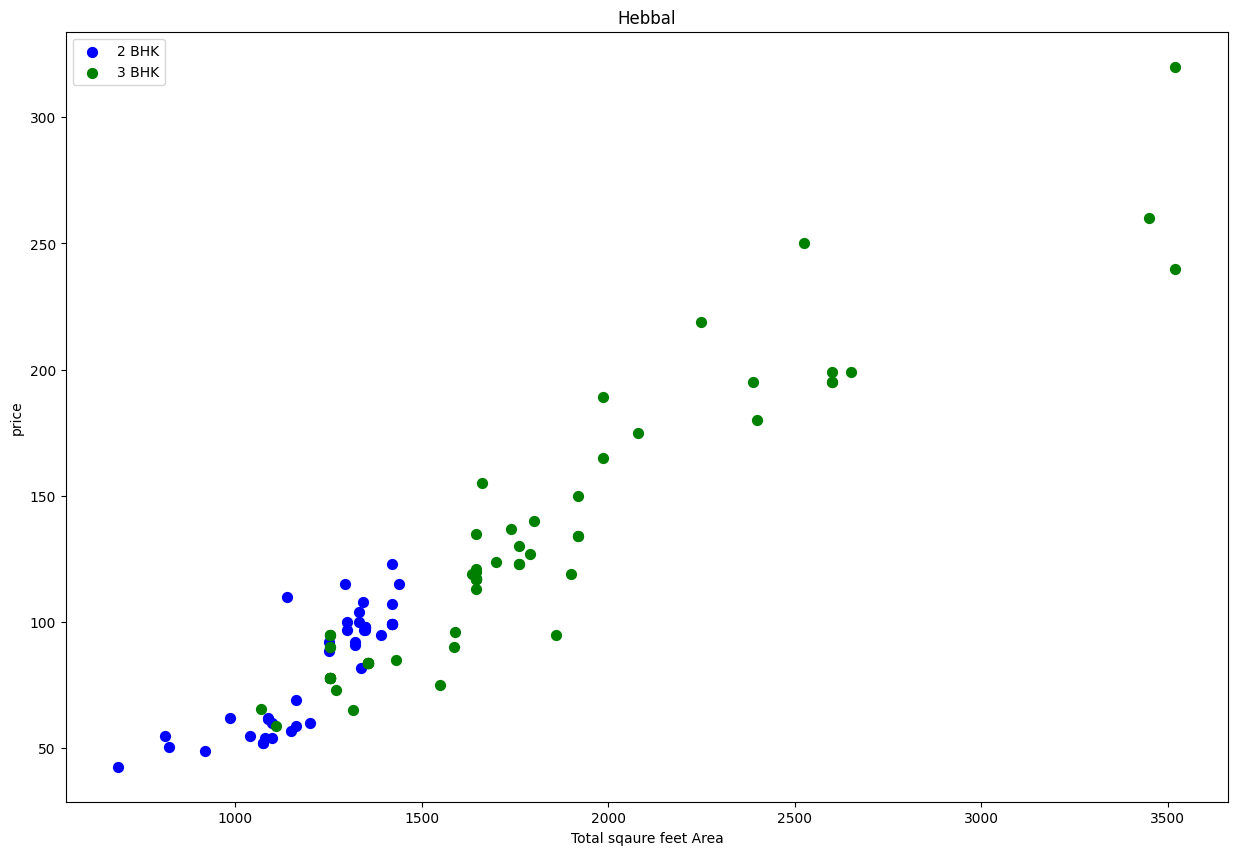

In [35]:
# now we will check price of 3 bhk is greater than 2 bhk or not .. for this we will visulaise this by this function

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    matplotlib.rcParams['figure.figsize'] = (15,10)

    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label = '2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label = '3 BHK',s=50)

    plt.xlabel("Total sqaure feet Area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Hebbal")


In [36]:
# as we can see there are 4 2bhk bedrroms whose price is more than 3bhk for the same area. so this is a outlier, we need to remove this... this is for all the location 

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7349, 7)

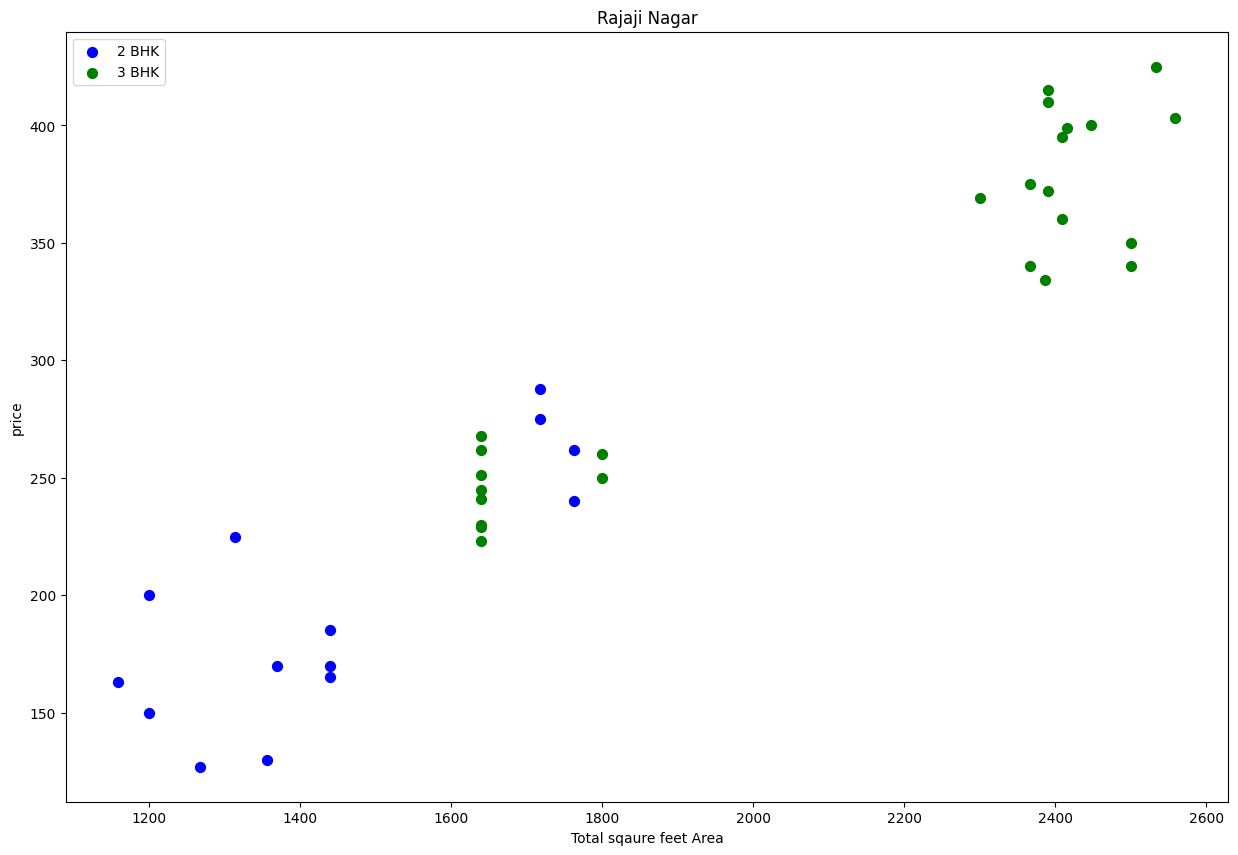

In [37]:
# Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

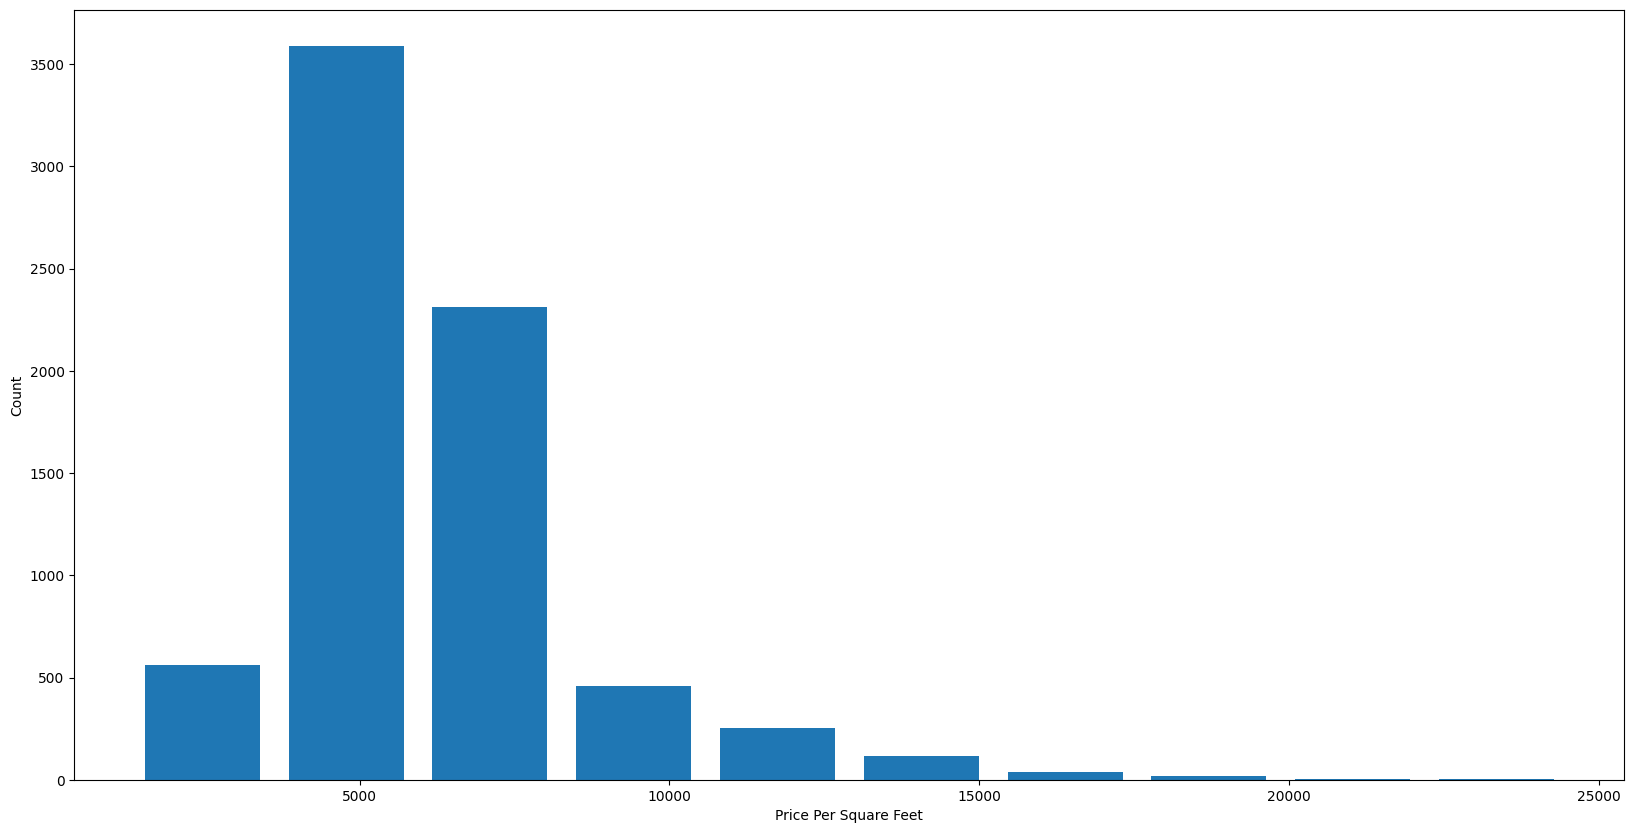

In [38]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Outlier Removal Using Bathrooms Feature

In [39]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

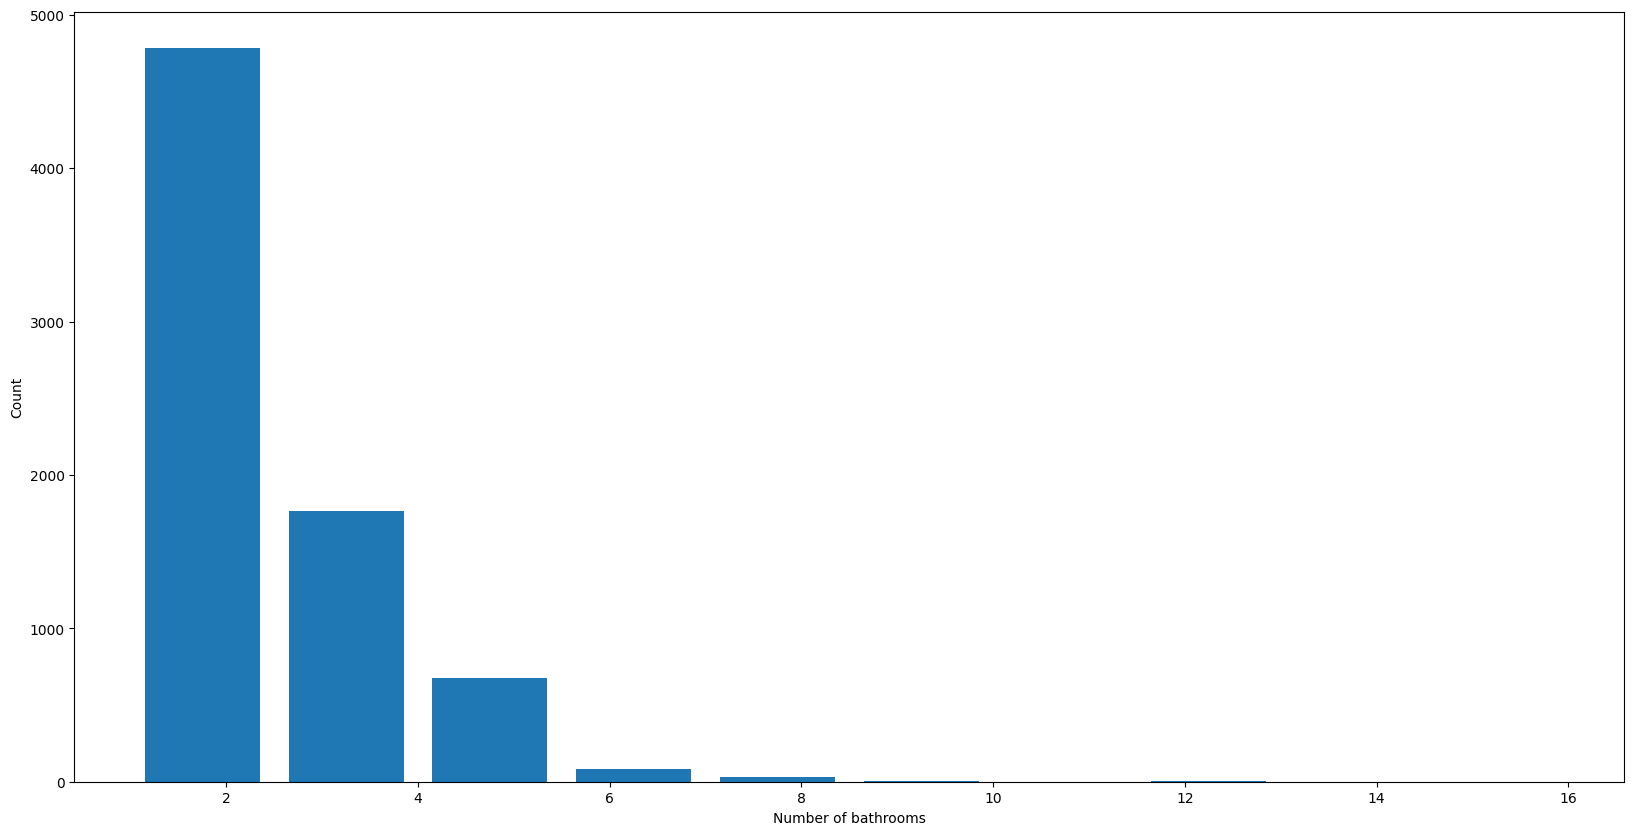

In [40]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [41]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5280,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.00
8495,other,10 BHK,12000.0,12.0,525.0,10,4375.00
8584,other,16 BHK,10000.0,16.0,550.0,16,5500.00
9324,other,11 BHK,6000.0,12.0,150.0,11,2500.00
9656,other,13 BHK,5425.0,13.0,275.0,13,5069.12


In [42]:
df8.shape

(7349, 7)

In [43]:
#Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

df8[df8.bath>df8.bhk+2] 

# so now we will remove these  


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1639,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5241,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6715,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8419,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [44]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7271, 7)

In [45]:
df9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.00
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.67
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.80
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.40
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.65


In [46]:
# now we will start building a model but before that we will remove some unnecessary features like size as we already have bhk as a good replacement of size and we will also remove price_per_sqft which we added just to remove outliers of price .. 

df10 = df9.drop(['price_per_sqft','size'],axis='columns')
df10.head()


,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


### Use One Hot Encoding For Location

In [47]:
# but before that right now we have a text column that a ml model cant process so we have to convert that in to numerical form and to do this we use " hot encoding " also called as dummies.

dummies = pd.get_dummies(df10.location)  
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
df11 = pd.concat([df10,dummies.drop('other',axis = 'columns')],axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,65.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,947.0,2.0,43.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df12 = df11.drop('location',axis = 1)
df12.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,65.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,43.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
df12.shape

(7271, 245)

### BUild model now..

In [51]:
#dependent and independent feature

X = df12.drop('price',axis=1)
y = df12.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [52]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [53]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7799483466284167

### Use K Fold cross validation to measure accuracy of our LinearRegression 

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85258685, 0.87042462, 0.87632459, 0.85011719, 0.80091138])

- We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

### Find best model using GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.850073,{}
1,lasso,0.721782,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.759635,"{'criterion': 'squared_error', 'splitter': 'ra..."


- Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [56]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [57]:
print(predict_price('1st Phase JP Nagar',1000, 2, 2))

81.48165284345346


c:\Users\KIIT0001\Documents\Desktop\ML PROJECT\Banglore_House_Pricing_PROJECT\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [58]:
print(predict_price('1st Phase JP Nagar',1000, 2, 3))


78.70524984077663


c:\Users\KIIT0001\Documents\Desktop\ML PROJECT\Banglore_House_Pricing_PROJECT\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
print(predict_price('Indira Nagar',1000, 2, 2))

195.15335742589002


c:\Users\KIIT0001\Documents\Desktop\ML PROJECT\Banglore_House_Pricing_PROJECT\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Export the tested model to a pickle file


In [60]:

import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [61]:

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))